In [2]:
import numpy as np
import matplotlib.pyplot as plt

## What is PCA and Dimensinality Reduction Algorithem? 

<div dir="rtl">
معمولا دیتا ها در دنیای واقعی دارای فیچر های زیادی هستند به طور مثال دیتا های مربوط به قیمت یک خانه میتواند دارای ۵۰ تا ویژگی (‌فیچر )‌باشد مانند متراژ و تعداد اتاق و ...
</div>

<div dir="rtl">
و آموزش دادن دیتایی با تعداد زیاد فیچر ( ابعاد بالا ) نیازمند سخت افزار قوی تر و همچنین میتواند باعث OverFitting  شود 
</div>

<div dir="rtl">
همچنین بسیار مفید است که اول دیتا را ببینیم و Visualize کنیم تا درکی از دیتا پیدا کنیم و سپس مدلی روی آن دیتا آموزش دهیم  و همانطور که بالاتر گفتیم دیتا های دنیای واقعی اکثرا ابعاد بسیار بالایی دارند و نمیتوان آن ها را plot کرد برای همین میتوان از الگوریتم های کاهش ابعاد استفاده کرد تا ابعاد را به ۲ یا ۳ بعد کاهش داد و سپس plot کرد 

</div>

In [ ]:
def pca(X, num_components):
    X_meaned = X - np.mean(X, axis=0) # make data mean center(all data will around 0 )
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    # compute eigen values and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix) 
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced, eigenvector_subset

<div dir="rtl">اکنون برای نشان دادن کاربرد PCA در عمل یکی از دیتا ست های معروف که حاوی تعداد زیادی تصویر حاوی  گلبول های خونی سرطانی و غیر سرطانی هست 
</div>

<div dir="rtl">بالا تر گفتیم  PCA جلوگیری میکند از Overfitting و باعث بهبود عملکرد مدل ها میشود بنابراین از مدل Logestic Regression ( یکی از مدل های Regression هست که در مبحثی دیگر بهش پرداختیم) در ۲ حالت با استفاده از PCA و بدون استفاده از PCA امتحان میکنیم و نتایج را مقایسه میکنیم 

</div>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
leukemia = fetch_openml(data_id=1104, as_frame=False)
X = leukemia.data
y = leukemia.target

# we got two category in y we trasnform those into 0,1
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y_encoded))}")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset shape: (72, 7129)
Number of classes: 2


In [3]:
# Define a logistic regression model
model = LogisticRegression(max_iter=800, solver='saga')

# Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Cross-validation without PCA
scores_no_pca = cross_val_score(model, X_scaled, y_encoded, cv=cv, scoring='accuracy')
mean_score_no_pca = np.mean(scores_no_pca)

In [7]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=20, random_state=3)
X_pca = pca.fit_transform(X_scaled)

# Cross-validation with PCA
scores_pca = cross_val_score(model, X_pca, y_encoded, cv=cv, scoring='accuracy')
mean_score_pca = np.mean(scores_pca)

print(f"Cross-validation accuracy with PCA (20 components): {mean_score_pca:.4f}")

Cross-validation accuracy with PCA (20 components): 0.9171


/home/padir/Code/Python/JupyterImageProcessing/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/padir/Code/Python/JupyterImageProcessing/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/padir/Code/Python/JupyterImageProcessing/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/padir/Code/Python/JupyterImageProcessing/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/padir/Code/Python/JupyterImageProcessing/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached w

In [4]:


# Optional: Experiment with different numbers of components
components = [5, 10, 20, 50]
scores = []

for n in components:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    score = np.mean(cross_val_score(model, X_pca, y_encoded, cv=cv, scoring='accuracy'))
    scores.append(score)
    print(f"Accuracy with PCA ({n} components): {score:.4f}")
     


Accuracy with PCA (5 components): 0.9295
Accuracy with PCA (10 components): 0.8886
Accuracy with PCA (20 components): 0.9171
Accuracy with PCA (50 components): 0.9029


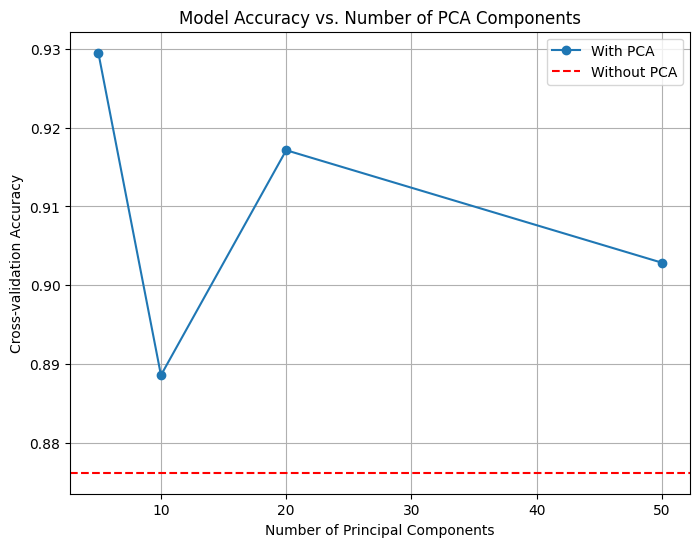

In [5]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(components, scores, marker='o', label='With PCA')
plt.axhline(y=mean_score_no_pca, color='r', linestyle='--', label='Without PCA')
plt.title('Model Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()